In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

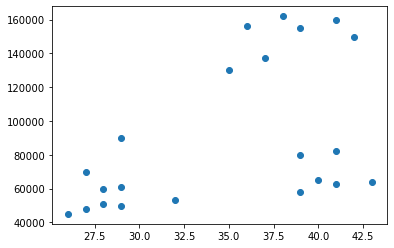

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

Name  Age  Income($)  cluster
0      Rob   27      70000        0
1  Michael   29      90000        0
2    Mohan   29      61000        2
3   Ismail   28      60000        2
4     Kory   42     150000        1

No handles with labels found to put in legend.


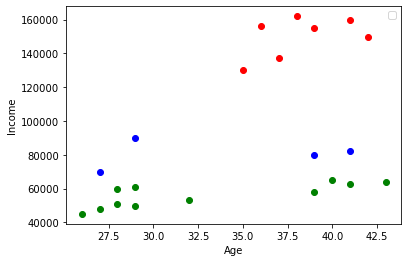

In [7]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='green')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        0
1  Michael  0.176471   0.384615        0
2    Mohan  0.176471   0.136752        2
3   Ismail  0.117647   0.128205        2
4     Kory  0.941176   0.897436        1

In [12]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [14]:
df['cluster'] = y_predicted
df.head()

Name       Age  Income($)  cluster
0      Rob  0.058824   0.213675        1
1  Michael  0.176471   0.384615        1
2    Mohan  0.176471   0.136752        1
3   Ismail  0.117647   0.128205        1
4     Kory  0.941176   0.897436        0

Text(0, 0.5, 'Income')

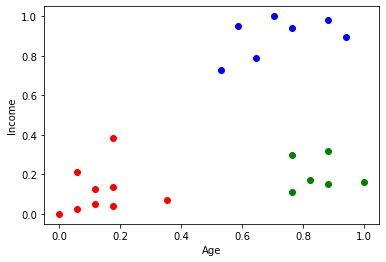

In [16]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age,df1['Income($)'],color='blue')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='green')

plt.xlabel('Age')
plt.ylabel('Income')

In [18]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

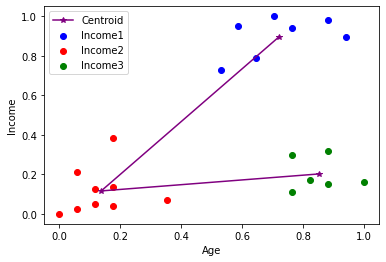

In [22]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age,df1['Income($)'],color='blue',label='Income1')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income2')
plt.scatter(df3.Age,df3['Income($)'],color='green',label='Income3')
plt.plot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [23]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [24]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.27558255687229755,
 0.22020960864009395,
 0.16858512236029757,
 0.13265419827245162,
 0.10383752586603559]

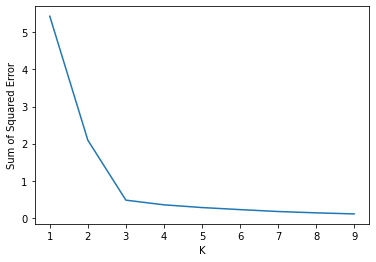

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)